<a href="https://colab.research.google.com/github/alexc957/Tensorflow-2-Practice/blob/main/Hand_Written_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the data and preprocess it 

In [ ]:
import tensorflow as tf 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train/255.
x_test = x_test/255.


11493376/11490434 [==============================] - 0s 0us/step


### create a custom callback to stop training after reaching an accuracy greater that 0.97

In [ ]:
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.97):
      print("reached 0.97 accuracy so cancelling training")
      self.model.stop_training = True

### create the model and train it and use the validation data to test the model's performance 

In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(64,activation=tf.nn.relu),
      tf.keras.layers.Dense(10,activation=tf.nn.softmax)

     ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
callback = MyCallBack()
history = model.fit(x_train,
          y_train,
          epochs=10,
          validation_data=(x_test,y_test),callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2987 - accuracy: 0.9165 - val_loss: 0.1794 - val_accuracy: 0.9457
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1414 - accuracy: 0.9583 - val_loss: 0.1274 - val_accuracy: 0.9611
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1029 - accuracy: 0.9698 - val_loss: 0.1078 - val_accuracy: 0.9670
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0804 - accuracy: 0.9755 - val_loss: 0.1013 - val_accuracy: 0.9685


In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 

def plot_curves(train_results,validation_results,y_label='accuracy'):
  epochs = range(1,len(train_results)+1)
  plt.plot(epochs,train_results,label='train')
  plt.plot(epochs,validation_results)
  plt.ylabel(y_label)
  plt.xlabel('epochs')
  plt.title(f'{y_label} vs epochs')
  plt.show()

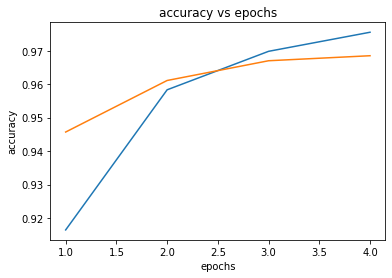

In [ ]:
plot_curves(history.history.get('accuracy'),history.history.get('val_accuracy'), y_label='accuracy')

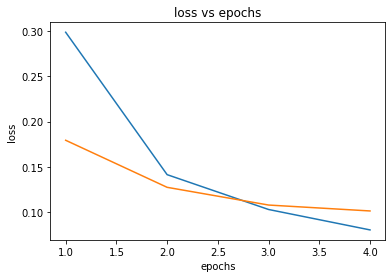

In [ ]:
plot_curves(history.history.get('loss'),history.history.get('val_loss'), y_label='loss')

### Results: this one show good results without overfitting 
